In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/ca6719dea56242762bba73d073a59cb5b898467a/housing_LR.csv")
df.head(5)

,Unnamed: 0,district,rooms,size,level,max_levels,price
0,0,Юнусабадский,3,57.0,4,4,52000.0
1,1,Яккасарайский,2,52.0,4,5,56000.0
2,2,Чиланзарский,2,42.0,4,4,37000.0
3,3,Чиланзарский,3,65.0,1,4,49500.0
4,4,Чиланзарский,3,70.0,3,5,55000.0


In [3]:
df=df[df['district']=='Чиланзарский']
df.head(4)


,Unnamed: 0,district,rooms,size,level,max_levels,price
2,2,Чиланзарский,2,42.0,4,4,37000.0
3,3,Чиланзарский,3,65.0,1,4,49500.0
4,4,Чиланзарский,3,70.0,3,5,55000.0
5,5,Чиланзарский,1,28.0,1,4,25500.0


In [4]:

x=df['size']
x

2       42.0
3       65.0
4       70.0
5       28.0
6       30.0
        ... 
7217    70.0
7235    20.0
7246    32.0
7258    70.0
7277    30.0
Name: size, Length: 1616, dtype: float64

In [5]:
y=df['price']
y

2       37000.0
3       49500.0
4       55000.0
5       25500.0
6       21200.0
         ...   
7217    48000.0
7235    18500.0
7246    28000.0
7258    49800.0
7277    22914.0
Name: price, Length: 1616, dtype: float64

In [6]:
theta1 = np.sum((x-x.mean())*(y-y.mean())) / np.sum((x-x.mean())**2)
theta1


740.0264822713249

In [7]:
theta0 = y.mean() - theta1 * x.mean()
theta0

-195.94911352666531

In [8]:
# 2-masala

In [9]:
y_pre = theta0 + theta1 * x
y_pre

2       30885.163142
3       47905.772234
4       51605.904645
5       20524.792390
6       22004.845355
            ...     
7217    51605.904645
7235    14604.580532
7246    23484.898319
7258    51605.904645
7277    22004.845355
Name: size, Length: 1616, dtype: float64

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

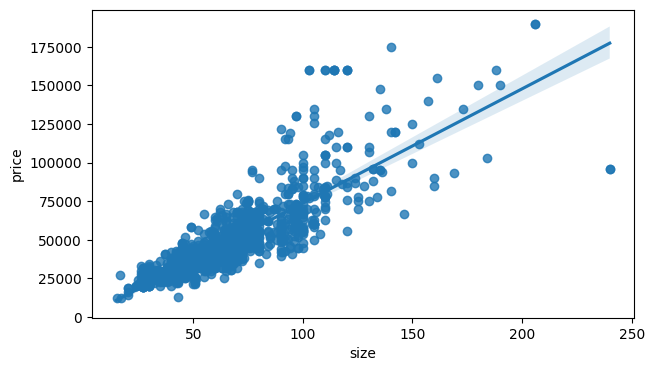

In [11]:
plt.figure(figsize=(7,4))
sns.regplot(df,x='size',y='price')
plt.show()

In [12]:
x_sam=x.sample(10)
x_sam

5647    130.0
6585     50.0
1072     67.0
5051     34.0
818      51.0
210      36.0
1879     48.0
5199     58.0
3964     48.0
5548     48.0
Name: size, dtype: float64

In [13]:
y_sam = y.loc[x_sam.index]
y_sam

5647    110000.0
6585     37500.0
1072     52500.0
5051     29000.0
818      34500.0
210      26500.0
1879     31000.0
5199     42000.0
3964     31000.0
5548     34000.0
Name: price, dtype: float64

In [14]:
y_predicted = theta0 + theta1*x_sam
y_predicted

5647    96007.493582
6585    36805.375000
1072    49385.825199
5051    24964.951284
818     37545.401482
210     26445.004248
1879    35325.322035
5199    42725.586858
3964    35325.322035
5548    35325.322035
Name: size, dtype: float64

In [15]:
mae = np.sum(np.abs(y_predicted - y_sam)) / len(y_sam)
mae

3563.8305134635207

In [16]:
msae = np.sqrt(np.sum((y_sam - y_predicted) ** 2)) / len(y_sam) 
msae

1646.905320657516

In [17]:
from sklearn.model_selection import train_test_split
train_set,test_set = train_test_split(df,test_size=0.2,random_state=42)

In [18]:
from sklearn.linear_model import LinearRegression
LR_model = LinearRegression()

In [19]:
x_train = np.asanyarray(train_set[['size']])
y_train = np.asanyarray(train_set[['price']])

#Modelni tarbiyalash
LR_model.fit(x_train,y_train)

# y=ax+b thet0=a va theta1=b qiymatlarni ajratib olish
theta0 = LR_model.coef_[0][0]
theta1 = LR_model.intercept_[0]

print("Theta0:",theta0)
print("Theta1",theta1)


Theta0: 753.8444656913779
Theta1 -1009.2734590636028


In [20]:
#Scikit learn

In [21]:
from sklearn.model_selection import train_test_split
train_set,test_set = train_test_split(df, test_size = 0.2 ,random_state = 42)

In [22]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()

In [23]:
x_train = np.asanyarray(train_set[['size']])
y_train = np.asanyarray(train_set[['price']])

# modelni o'qitamiz
lr_model.fit(x_train,y_train)



LinearRegression()

In [24]:
print(f"Theta 0 =",lr_model.coef_[0][0])
print(f"Theta 0 =",lr_model.intercept_[0])

Theta 0 = 753.8444656913779
Theta 0 = -1009.2734590636028


In [25]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=housing,x = 'size' , y = 'price')
plt.plot(x_train, theta0+theta1*x,'-r')
plt.show()

NameError: name 'housing' is not defined

<Figure size 1000x600 with 0 Axes>

In [ ]:
x_test = np.asanyarray(test_set[['size']])
y_test = np.asanyarray(test_set[['price']])

In [ ]:
from sklearn.metrics import mean_absolute_error , mean_squared_error
y_pre = lr_model.predict(x_test)

In [ ]:
msae = np.sqrt(mean_squared_error(y_pre , y_test))
msae

In [ ]:
mae  = mean_absolute_error(y_pre,y_test)
mae

In [ ]:
#amaliyot

In [ ]:
df=pd.read_csv("https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/reklama_sales.csv")
df.head(5)

In [ ]:
for i in list(df.columns):
    plt.figure(figsize = (8,3))
    sns.scatterplot(df , x =df['Sales'], y = i)
    plt.show()
    
    

In [ ]:
train_set,test_set =train_test_split(df,test_size = 0.2 , random_state = 42)
x_train = np.asanyarray(train_set[['TV']])
y_train = np.asanyarray(train_set[['Sales']])

In [ ]:
lr_model.fit(x_train , y_train)

In [ ]:
x_test = np.asanyarray(test_set[['TV']])
y_test = np.asanyarray(test_set[['Sales']])


In [ ]:
y_predicted = lr_model.predict(x_test)


In [ ]:
mae = mean_absolute_error(y_test , y_predicted)
mae

In [ ]:
msae = np.sqrt(mean_absolute_error(y_test , y_predicted))
msae

In [ ]:
#Multiple Linear Regression

In [ ]:
df1=pd.read_csv("https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/ca6719dea56242762bba73d073a59cb5b898467a/housing_LR.csv" , index_col = 0)
print(len(df))
df1.head(5)

In [ ]:
housing = df[df.district == 'Чиланзарский']
housing = housing.drop('Unnamed: 0',axis=1)
housing

In [ ]:
from sklearn.model_selection import train_test_split
x,y = train_test_split(housing,test_size = 0.2 , random_state = 42)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10,4))
sns.pairplot(df[['size','price','level','rooms','max_levels']])
plt.show()

In [ ]:
lr_model = LinearRegression()

#x_train = np.asanyarray(x[['rooms', 'size', 'level', 'max_levels']])
x_train = np.asanyarray(x[['size', 'max_levels']])
y_train = np.asanyarray(x[['price']])

lr_model.fit(x_train , y_train)

In [ ]:
print(f"theta0 :{lr_model.coef_}")
print(f"theta1 :{lr_model.intercept_}")

In [ ]:
x_t = np.asanyarray(y[['size','max_levels']])
y_t = np.asanyarray(y[['price']])

y_p = lr_model.predict(x_t)

In [ ]:
from sklearn.metrics import mean_absolute_error , mean_squared_error

In [ ]:
mae = mean_absolute_error(y_t,y_p)
msae = np.sqrt(mean_squared_error(y_t , y_p))
mae , msae

In [26]:
#Curve_fit